# Assignment 1 - Binary Classifier using TensorFlow

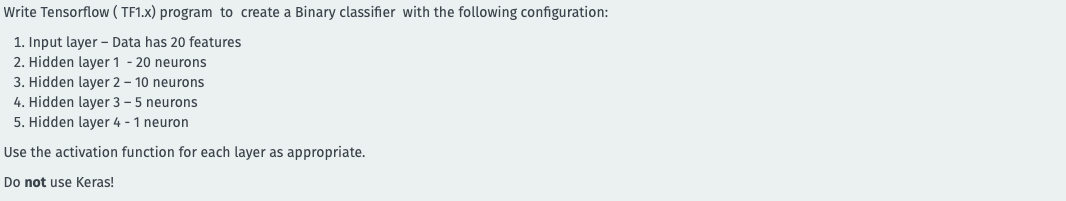

In [1]:
# Objective is to create multiple layers for the training and use relu as the intermediate activation function. 
# Sigmoid activation will be used as the last layer for the binary classification
# Here, it is worth mentioning that gaining accuracy improvement from 60 to 80 % should not be traeted as a 
# great achievement. However, 92 to 94% should be considered as a great achievement.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.__version__

'1.14.0'

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
data = pd.read_csv("sonar.txt")

In [8]:
data.columns

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

In [9]:
data.drop(columns=['attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribute_57', 'attribute_58', 'attribute_59', 'attribute_60'], inplace=True)

In [10]:
len(data.columns)

21

In [11]:
y_train = data[['Class']]

In [12]:
X_train = data.drop(columns=['Class'])

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

In [14]:
y_train.values

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### Following is the neural network plan

#### Input layer

In [15]:
# Create the model
# Design Parameters:
# Features: 20
# Label-size: 2
# Number of Neurons: 1
# Activation Function: sigmoid

In [16]:
# placeholder to read and feed the images at runtime. This is considered as the input layer
x = tf.placeholder(tf.float32, shape=[None, 20])

# placeholder to read and feed the image labels at runtime.
y = tf.placeholder(tf.float32, shape=[None, 1])

#### Other Hidden and output layers

In [17]:
# Neural network plan
features = ["Layer Number", "Number of neurons", "Weight shape", "Bias shape", "Activation Function", "Outputs"]
values = [
    ["1", "20", "(20, 20)", "(20)", "relu", "20"],
    ["2", "10", "(20, 10)", "(10)", "relu", "10"],
    ["3", "5", "(10, 5)", "(5)", "relu", "5"],
    ["3", "1", "(5, 1)", "(1)", "sigmoid", "1"]]
network_plan = pd.DataFrame(values, columns=features)
network_plan.set_index(features[0])

,Number of neurons,Weight shape,Bias shape,Activation Function,Outputs
Layer Number,,,,,
1,20,"(20, 20)",(20),relu,20
2,10,"(20, 10)",(10),relu,10
3,5,"(10, 5)",(5),relu,5
3,1,"(5, 1)",(1),sigmoid,1


In [18]:
def Dense(layer_input, weight_shape, bias_shape, activation):
    # hidden layer
    w = tf.Variable(tf.truncated_normal([weight_shape[0], weight_shape[1]], stddev=0.1))
    b = tf.Variable(tf.zeros([bias_shape]))
    
    # Net input function 
    I = tf.matmul(layer_input, w)+b

    # Output of the first hidden layer
    #output
    if activation=='sigmoid':
        output = tf.nn.sigmoid(I)
    elif activation=='softmax':
        output = tf.nn.softmax(I)
    else:
        output = tf.nn.relu(I)
    return output

In [19]:
def Train(labels, logits):
    # Loss and optimizer
    # Cross entropy
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
    train = optimizer.minimize(cross_entropy)
    return train

In [20]:
output1 = Dense(x, weight_shape=(20, 20), bias_shape=20, activation='relu')

In [21]:
output2 = Dense(output1, weight_shape=(20, 10), bias_shape=10, activation='relu')

In [22]:
output3 = Dense(output2, weight_shape=(10, 5), bias_shape=5, activation='relu')

In [23]:
output = Dense(output3, weight_shape=(5, 1), bias_shape=1, activation='sigmoid')

In [24]:
train1 = Train(labels=y, logits=output)

In [25]:
# Create Session
sess = tf.Session()
init = tf.global_variables_initializer()

In [26]:
sess.run(init)

In [27]:
def next_batch(n):
    start = int(np.random.uniform(low=1, high=13, size=(1,))[0])
    end = start*10
    return X_train[start:end], y_train[start:end]

In [28]:
# training (epoches)
for steps in range(10000):
    features, labels = next_batch(20)
    sess.run(train1, feed_dict={y:labels, x:features})

In [29]:
# Selecting a batch for test

In [30]:
test_features, test_labels = next_batch(100); 

In [31]:
# Pass the test data through the model
# NOTE: there are no loop for test
predict = sess.run(output, feed_dict={x: test_features})

In [32]:
# argmax will give predicted values in terms of numbers
result = sess.run(tf.argmax(predict, axis=1))

In [33]:
# following to be opened after the test

In [34]:
# Similarly, argmax for labels also needs to be considered for the comparison
labels = sess.run(tf.argmax(test_labels, axis=1))

In [35]:
accuracy_score(result, labels)

1.0